In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('TotalesNacionales.csv').transpose()
df = df.rename(columns={i: df.loc['Fecha', i] for i in range(19)})
df = df.drop(index=['Fecha'])
df.sample(5)

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
2020-11-04,633,515042,NaN,14340,8266,200,846,19405,8266,492436,481297,492149,8266,69402,1712,13,NaN,NaN,NaN
2021-02-20,2550,795845,NaN,19974,22438,1175,3893,47763,22438,753433,728108,753037,22438,113899,3832,168,NaN,NaN,NaN
2020-05-02,1246,18435,9572,247,8616,181,1427,8616,NaN,NaN,9572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10,3024,867949,NaN,21206,27982,708,3958,60077,27982,818761,786666,818337,27982,135016,8237,226,1061,389,105
2020-10-06,1019,473306,NaN,13070,14818,500,1554,24783,14818,445418,435453,445418,14818,62178,2833,35,NaN,NaN,NaN


In [3]:
# Se agrega casos diarios
df['Casos diarios'] = df['Casos totales'].diff(periods=1)
# Algo pasa el 2020-06-17, aumentaron demasiado los casos ese día.
n = 7
# Se agrega columna promedio 7 días para casos diarios.
df['Casos diarios promedio {} días'.format(n)] = df['Casos diarios'].rolling(window=n).mean()

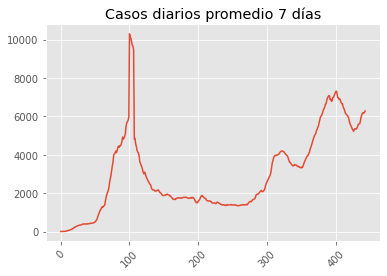

In [7]:
#df = df.drop(index=['2020-06-17'])
plt.plot(df['Casos diarios promedio 7 días'][7:].values)
plt.xticks(rotation=45)
plt.title('Casos diarios promedio 7 días')
plt.show()

In [6]:
df.loc['2020-06-10':'2020-06-20', 'Casos diarios promedio 7 días']

2020-06-10     4981.142857
2020-06-11     5114.285714
2020-06-12     5478.142857
2020-06-13     5658.571429
2020-06-14     5734.714286
2020-06-15     5798.571429
2020-06-16     5955.714286
2020-06-17    10304.571429
2020-06-18    10144.428571
2020-06-19    10078.142857
2020-06-20     9913.285714
Name: Casos diarios promedio 7 días, dtype: float64